## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].value_counts())
print("The number of mice is:", number_mice)

The number of mice is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_g989 = combined_df.loc[combined_df["Mouse ID"]=='g989']
Mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"]!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(clean_df["Mouse ID"].value_counts())
print("The number of mice in the clean DataFrame is:", number_mice_clean)

The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Used the second technique below.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug = clean_df.groupby("Drug Regimen")
new_df = pd.DataFrame(drug["Tumor Volume (mm3)"].count())

#Renaming first column
new_df.columns=["Count"]

#Calculating the mean and placing it into a new column named "Mean" in the new_df
mean_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].mean())
new_df["Mean"] = mean_drug

#Calculating the median and placing it into a new column named "Median" in the new_df
median_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].median())
new_df["Median"] = median_drug

#Calculating the variance and placing it into a new column named "Variance" in the new_df
variance_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].var())
new_df["Variance"] = variance_drug

#Calculating the standard deviation and placing it into a new column named "Std Dev" in the new_df
std_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].std())
new_df["Std Dev"] = std_drug

#Calculating the Standard error and placing it into a new column named "SEM" in the new_df
sem_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].sem())
new_df["SEM"] = sem_drug

#Formatting the data with two decimals:
new_df["Mean"]=new_df["Mean"].map("{:,.2f}".format)
new_df["Median"]=new_df["Median"].map("{:,.2f}".format)
new_df["Variance"]=new_df["Variance"].map("{:,.2f}".format)
new_df["Std Dev"]=new_df["Std Dev"].map("{:,.2f}".format)
new_df["SEM"]=new_df["SEM"].map("{:,.2f}".format)

#Displaying the summary table 'new_df':
new_df 


,Count,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,148,52.32,50.45,43.85,6.62,0.54
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

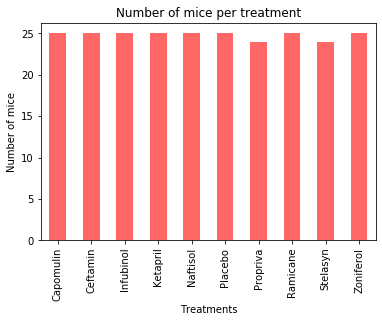

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#Using the same group by function named 'drug' to create our DataFrame and count the number of mice
drug = clean_df.groupby("Drug Regimen")
mouse_df = pd.DataFrame(drug["Mouse ID"].value_counts())
#Rename column of mouse_df
mouse_df.columns=["Count"]
#Group mouse_df by Drug Regimen and count the number of mice per Drug Regimen
mouse_count = mouse_df.groupby("Drug Regimen")
mouse_count_df = pd.DataFrame(mouse_count["Count"].count())

#Plotting the bar chart:
mouse_count_df.plot(kind="bar", facecolor="red", alpha=0.6, legend = None)
# Set textual properties
plt.title("Number of mice per treatment")
plt.ylabel("Number of mice")
plt.xlabel("Treatments")
# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

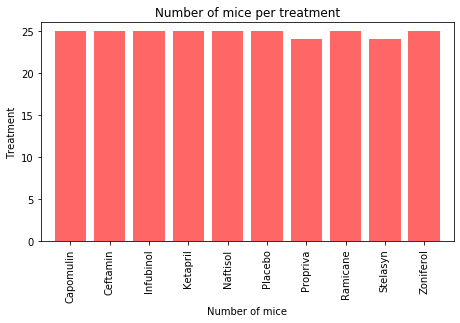

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Reset the index of dataframe mouse_count_df
mouse_index = mouse_count_df.reset_index()
mouse_index

#Set the axis and tick locations
x_axis = mouse_index["Drug Regimen"]
y_axis = mouse_index["Count"]
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.5,4.6))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, mouse_index["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)

# Set a Title and labels
plt.title("Number of mice per treatment")
plt.xlabel("Number of mice")
plt.ylabel("Treatment")

# Save our graph and show the grap
plt.tight_layout()
plt.show

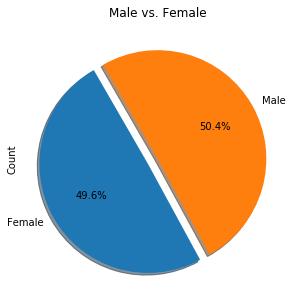

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Use group by function to analyse female versus male mice
sex = clean_df.groupby("Sex")
sex_df = pd.DataFrame(sex["Mouse ID"].value_counts())
#Rename column to Count
sex_df.columns = ["Count"]
sex_df
#Use group by function to see the total number of mice
sex_count = sex_df.groupby("Sex")
sex_count_series = sex_count["Count"].count()
sex_count_series

#Creating the pie chart using Pandas
sex_count_chart = sex_count_series.plot(kind='pie', explode = (0.1,0), autopct="%1.1f%%", shadow=True, 
                                        startangle=120,figsize=(7,5), title="Male vs. Female")
plt.show()

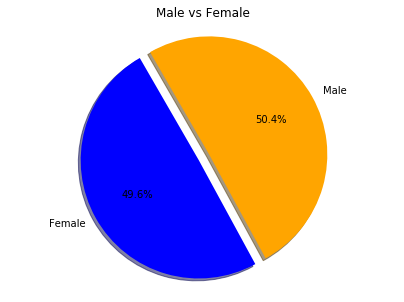

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
values =[123,125]
colours= ["Blue","Orange"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(7,5))
plt.pie(values, explode=explode,labels = labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=120)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#Write a title
plt.title("Male vs Female")
# Print the final chart
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Drop the duplicates from clean_df except the last value to be able to get the last timepoint for each mouse
last_timepoint = clean_df.drop_duplicates(["Mouse ID"], keep='last')
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#The technique above has already identified the Tumar Volume(mm3) at the last time point.
#Refining the Data for only four treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments = last_timepoint.loc[(last_timepoint["Drug Regimen"]=="Capomulin")|
                                    (last_timepoint["Drug Regimen"]=="Ramicane") |
                                    (last_timepoint["Drug Regimen"]=="Infubinol") |
                                    (last_timepoint["Drug Regimen"]=="Ceftamin") ]
four_treatments                                    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_Capomulin = (four_treatments.loc[four_treatments["Drug Regimen"]=="Capomulin"])["Tumor Volume (mm3)"]
tumor_Ramicane = (four_treatments.loc[four_treatments["Drug Regimen"]=="Ramicane"])["Tumor Volume (mm3)"]
tumor_Ceftamin = (four_treatments.loc[four_treatments["Drug Regimen"]=="Ceftamin"])["Tumor Volume (mm3)"]
tumor_Infubinol = (four_treatments.loc[four_treatments["Drug Regimen"]=="Infubinol"])["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = [tumor_Capomulin,tumor_Ramicane,tumor_Infubinol,tumor_Ceftamin]

#Calculations for Capomulin:
for x in data:
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr =upperq_cap-lowerq_cap

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


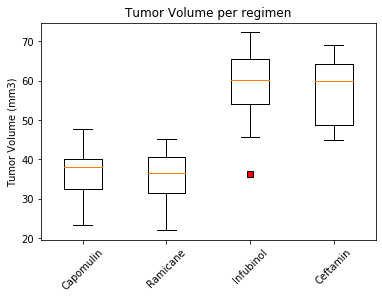

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


data = [tumor_Capomulin,tumor_Ramicane,tumor_Infubinol,tumor_Ceftamin]
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per regimen')
ax1.set_xticklabels(Treatments, rotation=45, fontsize=10)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_square)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
